# Diabetes Prediction with Logistic Regression

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Cost Function
def cost(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W))) # hypothesis representation
    cost = np.dot(Y, -np.log(h)) + np.dot((1-Y), np.log(1-h)) # cost function
    J = -1 / (len(X)) * np.sum(cost) # mean cost
    return J

In [3]:
# Gradient Descent
def gradient(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W)))
    diff = h - Y
    grad = 1 / (len(X)) * np.dot(diff, X)
    return grad

In [4]:
def createData(fName):
    file = open(fName, 'rb')
    data = np.loadtxt(file, delimiter=",", skiprows=1)
    X = data[:, 0:8]
    X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0) # normalize data
    Y = data[:, 8] # outcome column is label
    return X, Y

In [5]:
def accuracy(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W)))
    y_pred = np.around(h)
    pMask = Y == y_pred # create mask for values where predicted is correct
    acc = sum(pMask) / len(pMask)
    return acc


In [6]:
filename = "diabetes2.csv"
X, Y = createData(filename)
X = np.c_[np.ones(X.shape[0]), X] # Add bias as first column

In [7]:
lr = 0.001
weights = [0, 0, 0, 0, 0, 0, 0, 0, 0]
loss = []
loss.append(cost(X, Y, weights))
count = 0
while count < 10000:
    grad = gradient(X, Y, weights)
    weights = weights - lr*grad
    loss.append(cost(X, Y, weights))
    count += 1

print("Final weights: ", weights)
print("Final cost: ", loss[-1])
print("Accuracy", accuracy(X, Y, weights))

Final weights:  [-0.64392898  0.29515392  0.78730122 -0.11343963  0.00261644  0.01429073
  0.47770982  0.24176111  0.22467336]
Final cost:  0.002858577643417755
Accuracy 0.76953125


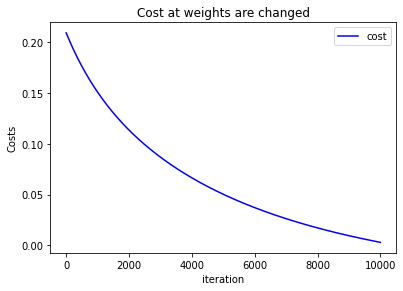

In [8]:
# Plot graph of cost vs iteration as weights are changed
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(np.arange(len(loss)), loss, "b-", label="cost")

ax.set_title("Cost at weights are changed")
ax.set_xlabel("iteration")
ax.set_ylabel("Costs")
ax.legend()
plt.show()